# 다항회귀
- 데이터가 단순히 직선의 형태가 아닌 비선형의 형태를 가지고 있는 경우, 각 변수의 거듭 제곱을 새로운 변수로 추가하면 선형의 모델로 사용 가능
- 확장된 특성을 데이터셋에 선형 모델로 훈련시키는 방법

In [37]:
import pandas as pd

In [38]:
cereal = pd.read_csv("../data_git/data/cereal.csv")

In [39]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [40]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [41]:
# 문자형 데이터를 제외
cereal = cereal.iloc[: , 3:]
cereal.head(1)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973


In [42]:
# 설탕의 함유량에 따른 영양등급 평가에 대한 회귀
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [43]:
# (cereal['sugars']<0).sum()

flag = cereal['sugars'] < 0

cereal.loc[flag, ]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [44]:
cereal.drop([57], axis = 0)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [45]:
# 음수 조건식에 부정 : 비트연산자를 이용하여 부정 처리
# .loc은 DataFrame의 타입을 잠깐 바꿈 위치를 찾기 위해서. 되돌려주는건 다시 DF로.
cereal = cereal.loc[~flag,]

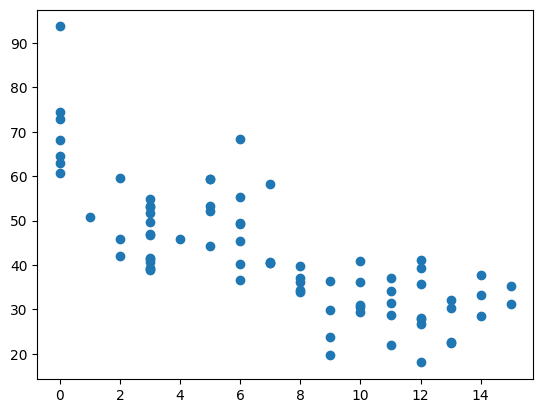

In [46]:
# scatter 그래프를 이용하여 데이터의 분포를 확인
import matplotlib.pyplot as plt
x = cereal['sugars']
y = cereal['rating']
plt.scatter(x, y)
plt.show()

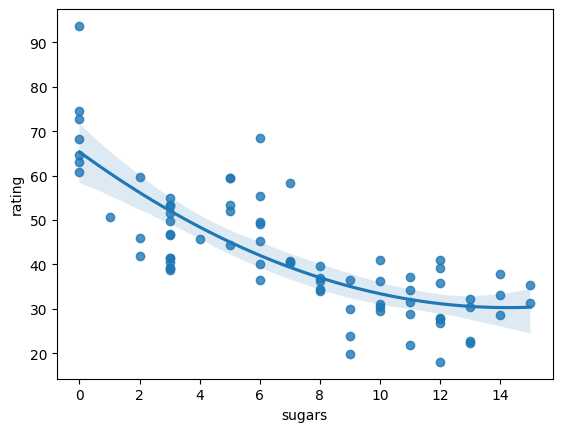

In [56]:
# 산점도 그래프에서 회귀선을 추가하여 그래프 생성
import seaborn as sns

sns.regplot(data = cereal, x='sugars', y='rating', order=2)

plt.show()

In [59]:
# sugars, rating 두 개의 컬럼을 이용하여 선형회귀 모델 학습
cereal2 = cereal[['sugars', 'rating']]

In [60]:
cereal2

,sugars,rating
0,6,68.402973
1,8,33.983679
2,5,59.425505
3,0,93.704912
4,8,34.384843
...,...,...
72,3,39.106174
73,12,27.753301
74,3,49.787445
75,3,51.592193


In [67]:
x = cereal2['sugars'].values
y = cereal2['rating'].values

In [73]:
# 행렬 구조를 변경
x.reshape(38, 2)
x.reshape(-1, 1)

array([[ 6],
       [ 8],
       [ 5],
       [ 0],
       [ 8],
       [10],
       [14],
       [ 8],
       [ 6],
       [ 5],
       [12],
       [ 1],
       [ 9],
       [ 7],
       [13],
       [ 3],
       [ 2],
       [12],
       [13],
       [ 7],
       [ 0],
       [ 3],
       [10],
       [ 5],
       [13],
       [11],
       [ 7],
       [10],
       [12],
       [12],
       [15],
       [ 9],
       [ 5],
       [ 3],
       [ 4],
       [11],
       [10],
       [11],
       [ 6],
       [ 9],
       [ 3],
       [ 6],
       [12],
       [ 3],
       [11],
       [11],
       [13],
       [ 6],
       [ 9],
       [ 7],
       [ 2],
       [10],
       [14],
       [ 3],
       [ 0],
       [ 0],
       [ 6],
       [12],
       [ 8],
       [ 6],
       [ 2],
       [ 3],
       [ 0],
       [ 0],
       [ 0],
       [15],
       [ 3],
       [ 5],
       [ 3],
       [14],
       [ 3],
       [ 3],
       [12],
       [ 3],
       [ 3],
       [ 8]])

In [68]:
# train, test로 나눠준다.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size = 0.3, random_state = 42
)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), Y_train)
pred_1 = lr.predict(X_test.reshape(-1, 1))
mae = mean_absolute_error(Y_test, pred_1)

print(round(mae, 4))

7.8443


In [74]:
# n차원 다항 조건 생성
from sklearn.preprocessing import PolynomialFeatures

In [84]:
# PolynomialFeatures class 생성
# degree: 차수 지정
poly_reg = PolynomialFeatures(degree = 2)

# poly_reg에 범위 지정하고 데이터를 변환하여 되돌려준다.
X_train_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly_reg.transform(X_test.reshape(-1, 1))

# 단순 선형 회귀 모델을 생성
lr = LinearRegression()
lr.fit(X_train_poly, Y_train)
pred_2 = lr.predict(X_test_poly)
mae_2 = mean_absolute_error(Y_test, pred_2)

In [85]:
print(round(mae_2, 4))

7.1364
